In [13]:
# necessary imports
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from io import StringIO

### Load Data

In [3]:
df = pd.read_csv(os.path.join("clean_data", "final_data.csv"))

## Descriptive Statistics

In [9]:
df.describe(include="all")

,timestamp,name,category,brightness,at_home,stress,valence,arousal,attention,pcode
count,191984,191984,191984,190051,191984,189369.000000,189369.000000,189369.00000,189369.000000,189369
unique,191965,260,9,3,2,NaN,NaN,NaN,NaN,77
top,2019-05-21 22:53:44.760000+09:00,Facebook,SOCIAL,LOW,False,NaN,NaN,NaN,NaN,P56
freq,2,47637,109561,177275,153905,NaN,NaN,NaN,NaN,11030
mean,NaN,NaN,NaN,NaN,NaN,0.312765,0.549520,0.36788,0.472231,NaN
std,NaN,NaN,NaN,NaN,NaN,0.463621,0.497543,0.48223,0.499230,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.00000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,0.00000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.00000,1.000000,NaN


### Visualisations

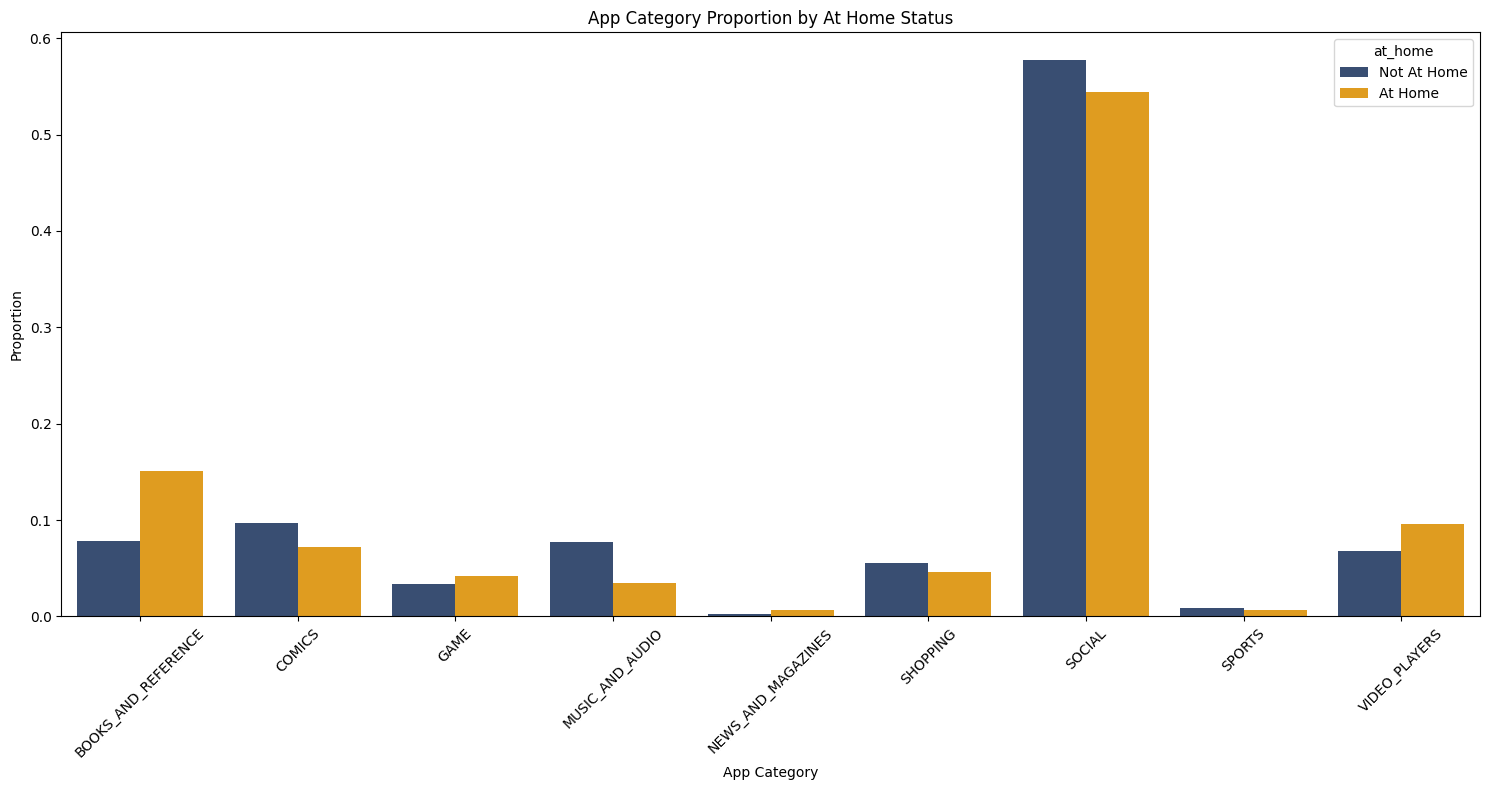

In [14]:
# Calculate the distributions
at_home_dist = df[df["at_home"]]["category"].value_counts() / df[df["at_home"]].shape[0]
not_at_home_dist = df[~df["at_home"]]["category"].value_counts() / df[~df["at_home"]].shape[0]

# Create a DataFrame for plotting
dist_df = pd.DataFrame({
    'category': at_home_dist.index.tolist() + not_at_home_dist.index.tolist(),
    'proportion': at_home_dist.tolist() + not_at_home_dist.tolist(),
    'at_home': ['At Home'] * len(at_home_dist) + ['Not At Home'] * len(not_at_home_dist)
}).sort_values(by=["proportion"], ascending=False)

# Sort the DataFrame by app_category
dist_df = dist_df.sort_values(by=['category', 'at_home'], ascending=[True, False])

# Plot the data
plt.figure(figsize=(15, 8))
sns.barplot(x='category', y='proportion', hue='at_home', data=dist_df, palette=['#2f4b7c', '#ffa600'])
plt.xlabel('App Category')
plt.ylabel('Proportion')
plt.title('App Category Proportion by At Home Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()